In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import nltk
import spacy
nltk.download('stopwords')
nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
#python -m pip install package_name
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Sajin.LAPTOP-
[nltk_data]     RE0DL8PH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Sajin.LAPTOP-
[nltk_data]     RE0DL8PH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

target
0    4342
1    3271
Name: count, dtype: int64


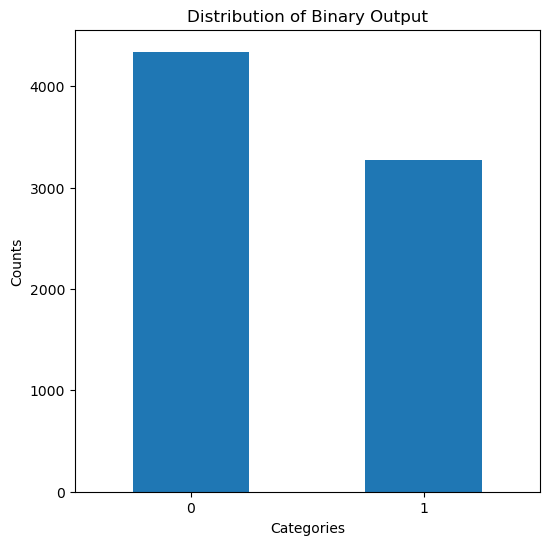

In [3]:
import matplotlib.pyplot as plt

# Calculate counts of each category
counts = train_data['target'].value_counts()
print(counts)

# Plotting
plt.figure(figsize=(6, 6))
counts.plot(kind='bar')
plt.title('Distribution of Binary Output')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotate x-labels if needed
plt.show()

In [4]:
from twitter_clean import clean_text,text_deduplication
train_data['clean_text']=train_data['text'].apply(clean_text)
test_data['clean_text']=test_data['text'].apply(clean_text)
train_data.to_csv('train_clean.csv',index=False)
test_data.to_csv('test_clean.csv',index=False)

In [5]:
stop_words = set(stopwords.words('english')+["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"])
nlp = spacy.load("en_core_web_sm")
def preprocessing(text):
    tokens=word_tokenize(text.lower().strip())
    filtered_tokens=[token for token in tokens if token not in stop_words]
    lemmatized_spacy = [token.lemma_ for token in nlp(" ".join(filtered_tokens))]
    return " ".join(lemmatized_spacy)#' '.join(tokens)
train_data['preprocessed_text']=train_data['clean_text'].apply(preprocessing)
test_data['preprocessed_text']=test_data['clean_text'].apply(preprocessing)
train_data.to_csv('train_preprocessed.csv',index=False)
test_data.to_csv('test_preprocessed.csv',index=False)

In [6]:
new_train=text_deduplication(train_data[['preprocessed_text','target']],'preprocessed_text','target')
new_train.to_csv('new_train.csv')

[0.86136829] [0.74195533]
360wisenews : china 's stock market crash : gem rubble ?
[0.4608704] [0.32955014]
armageddon
[0.5167502] [0.62880941]
ashe 2015 : australia 's collapse trent bridge bad history : england bundle australia 60 ..
[1.] [0.83975393]
bayelsa poll : tension bayelsa patience jonathan plan hijack apc pdp : plan former first lady ..
[0.20845715] [0.29468313]
caution : breathing may hazardous health .
[0.70413243] [0.38821384]
china 's stock market crash summer spark interest bargain hunt ..
[0.39866759] [0.1517177]
choke hazard prompt recall kraft cheese single
[0.15401767] [0.28843809]
cindy noonan - heartbreak baltimore rioting yahistorical undergroundrailraod
[0.87521789] [0.18226569]
deluge low self - image ? take quiz :
[0.84091196] [0.70698351]
detonate ( feat . m.o.p . ) apollo brown
[0.40500347] [0.75021125]
earthquake drill ? ?
[0.15506023] [0.81576379]
faan orders evacuation abandon aircraft mma
[0.83863034] [0.29003787]
feel like sink low self - image ? take 

In [7]:
new_train

,preprocessed_text,target,new_target
0,! resident return destroy home washington wild...,1.0,1.0
1,# ? ? # ? ? # ? ? # ? ? mh370 : aircraft debri...,1.0,1.0
2,# ? ? # ? ? # ? ? # ? ? suicide bomber kill 15...,1.0,1.0
3,# ? ? # ? ? # ? ? # ? ? train derailment : ' i...,1.0,1.0
4,# ? x ? : : counter act burn alexandrian libra...,1.0,1.0
...,...,...,...
6872,{ info } baekhyun suho attend idol sport champ...,0.0,0.0
6873,|| .. watch trail dust storm think part die .....,0.0,0.0
6874,} new lady shoulder tote handbag faux leather ...,0.0,0.0
6875,~ wicked weather roll calgary surround area,1.0,1.0
